## House Prices Prediction
https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques

Example Reference:
https://www.kaggle.com/code/gusthema/house-prices-prediction-using-tfdf

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install tensorflow_decision_forests

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 37.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 78.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 80.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 89.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 70.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 87.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 62.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 39.0 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      Successf

In [3]:
import tensorflow as tf
import tensorflow_decision_forests as tfdf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [4]:
print("TensorFlow v" + tf.__version__)
print("TensorFlow Decision Forests v" + tfdf.__version__)

TensorFlow v2.16.1
TensorFlow Decision Forests v1.9.1


In [5]:
df = pd.read_csv("drive/MyDrive/House Pricing/train.csv")

In [6]:
df["SalePrice"].isna().any() # check to see if any SalePrice values are missing

False

In [7]:
df.head(1)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500


In [8]:
df = df.drop(["Id"], axis=1) # Id Column not needed

In [9]:
list(set(df.dtypes.tolist())) # Let's see the different type of values in our dataset

[dtype('int64'), dtype('float64'), dtype('O')]

# Prepare our Datasets (train_df, val_df)

In [10]:
train_set, val_set = train_test_split(df, test_size=0.2, random_state=True)

In [11]:
train_set.shape, val_set.shape

((1168, 80), (292, 80))

In [12]:
# Convert our datasets into tensorflow datasets
train_df = tfdf.keras.pd_dataframe_to_tf_dataset(train_set, label='SalePrice', task = tfdf.keras.Task.REGRESSION)
val_df = tfdf.keras.pd_dataframe_to_tf_dataset(val_set, label='SalePrice', task = tfdf.keras.Task.REGRESSION)

# Select and Create a Model

Since our dataset contains a mixture of numerical and categorical values, we could use a decision tree model since it handle both features.

The one we will use to start is `tfdf.keras.RandomForestModel`.

In [13]:
tfdf.keras.get_all_models()

[tensorflow_decision_forests.keras.RandomForestModel,
 tensorflow_decision_forests.keras.GradientBoostedTreesModel,
 tensorflow_decision_forests.keras.CartModel,
 tensorflow_decision_forests.keras.DistributedGradientBoostedTreesModel]

In [14]:
rf_model = tfdf.keras.RandomForestModel(task = tfdf.keras.Task.REGRESSION)
rf_model.compile(metrics=["accuracy"])

Use /tmp/tmpk5ytrczl as temporary training directory


# Train our Model

In [15]:
rf_model.fit(train_df)

Reading training dataset...
Training dataset read in 0:00:09.544501. Found 1168 examples.
Training model...
Model trained in 0:00:07.959077
Compiling model...
Model compiled.


# Evaluate our Model using our Validation Dataset

In [16]:
evaluation = rf_model.evaluate(x=val_df,return_dict=True)

for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")

1/1 [==============================] - 4s 4s/step - loss: 0.0000e+00 - accuracy: 0.0000e+00
loss: 0.0000
accuracy: 0.0000


In [17]:
pred = rf_model.predict(val_df, verbose=1)

1/1 [==============================] - 0s 213ms/step


Results not good at all... lol,

Let's try checking which features seem to be the most important when our model makes a prediction.

In [18]:
inspector = rf_model.make_inspector()
inspector.evaluation()

Evaluation(num_examples=1168, accuracy=None, loss=None, rmse=29612.294476487914, ndcg=None, aucs=None, auuc=None, qini=None)

In [19]:
print(f"Available variable importances:")
for importance in inspector.variable_importances().keys():
  print("\t", importance)

Available variable importances:
	 NUM_NODES
	 SUM_SCORE
	 INV_MEAN_MIN_DEPTH
	 NUM_AS_ROOT


In [20]:
inspector.variable_importances()["NUM_AS_ROOT"]

[("OverallQual" (1; #62), 110.0),
 ("ExterQual" (4; #22), 56.0),
 ("Neighborhood" (4; #59), 39.0),
 ("GarageCars" (1; #32), 31.0),
 ("GrLivArea" (1; #38), 19.0),
 ("YearBuilt" (1; #76), 14.0),
 ("KitchenQual" (4; #44), 11.0),
 ("TotalBsmtSF" (1; #73), 9.0),
 ("GarageArea" (1; #31), 7.0),
 ("1stFlrSF" (1; #0), 2.0),
 ("BsmtQual" (4; #14), 1.0),
 ("FullBath" (1; #29), 1.0)]

In [21]:
df["ExterQual"].isna().any()

False

In [22]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

<ipython-input-24-a843077a6f84>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(val_set['SalePrice'], bins=100, hist_kws={'alpha': 0.4}, ax=axes[0])
<ipython-input-24-a843077a6f84>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pred, color='g', bins=100, hist_kws={'alpha': 0.4}, ax=axes[1])


Text(0.5, 1.0, 'Predicted Prices')

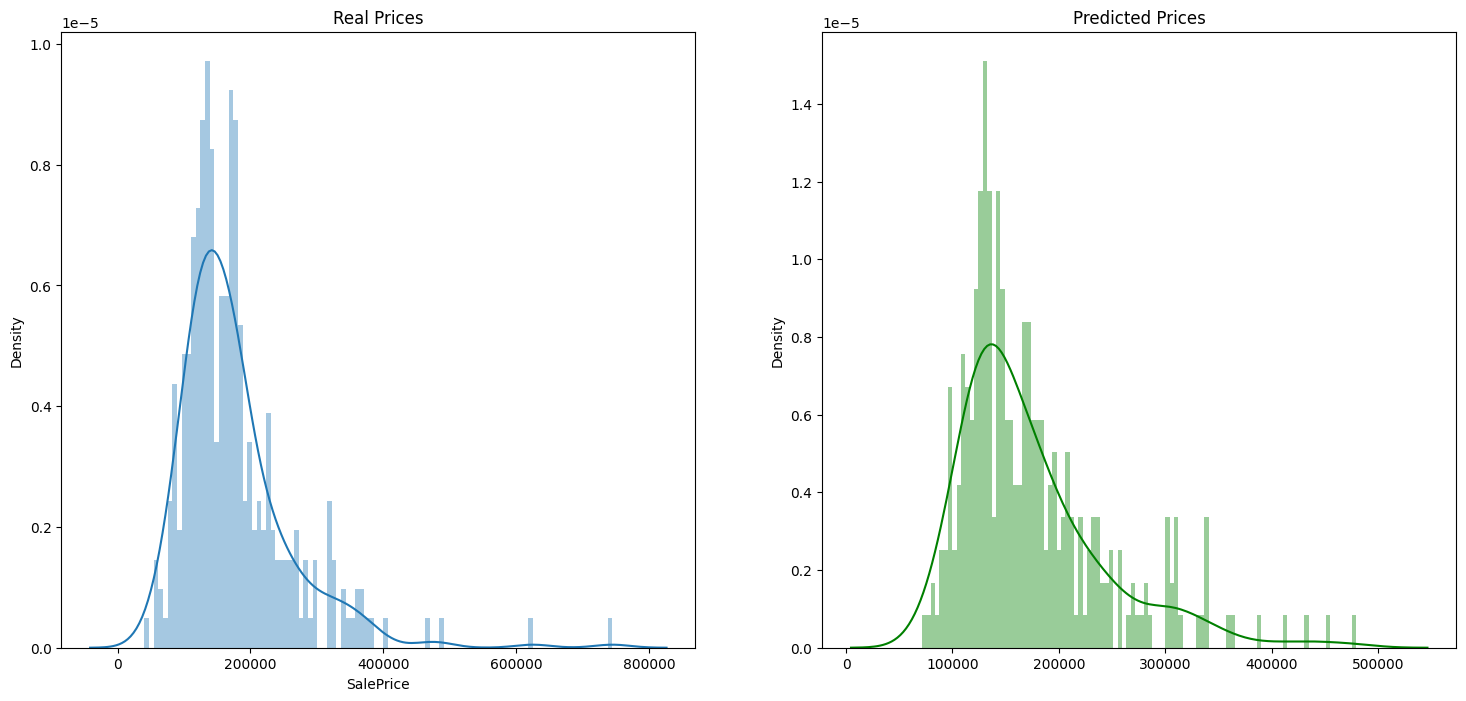

In [24]:
import seaborn as sns
# Create a figure with two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))  # 18 width for wider figure to accommodate two plots

# First subplot for real prices
sns.distplot(val_set['SalePrice'], bins=100, hist_kws={'alpha': 0.4}, ax=axes[0])
axes[0].set_title('Real Prices')

# Second subplot for predicted prices
sns.distplot(pred, color='g', bins=100, hist_kws={'alpha': 0.4}, ax=axes[1])
axes[1].set_title('Predicted Prices')

Despite our model not accurtely predicting the prices, it somewhat correctly outputs the estimated distribution curve of the prices.

# Make Improvements

## Let's try Gradient Boosted Tree


In [25]:
tfdf.keras.get_all_models()

[tensorflow_decision_forests.keras.RandomForestModel,
 tensorflow_decision_forests.keras.GradientBoostedTreesModel,
 tensorflow_decision_forests.keras.CartModel,
 tensorflow_decision_forests.keras.DistributedGradientBoostedTreesModel]

In [26]:
gb_model = tfdf.keras.GradientBoostedTreesModel(task = tfdf.keras.Task.REGRESSION)
gb_model.compile(metrics=["accuracy"])

Use /tmp/tmpp1at_1ah as temporary training directory


In [27]:
gb_model.fit(train_df)

Reading training dataset...
Training dataset read in 0:00:00.831485. Found 1168 examples.
Training model...
Model trained in 0:00:02.390743
Compiling model...
Model compiled.


In [28]:
evaluation = gb_model.evaluate(x=val_df,return_dict=True)

for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")

1/1 [==============================] - 0s 451ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00
loss: 0.0000
accuracy: 0.0000


In [29]:
pred2 = gb_model.predict(val_df, verbose=1)

1/1 [==============================] - 0s 190ms/step


<ipython-input-30-235ccb87049c>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(val_set['SalePrice'], bins=100, hist_kws={'alpha': 0.4}, ax=axes[0])
<ipython-input-30-235ccb87049c>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pred2, color='g', bins=100, hist_kws={'alpha': 0.4}, ax=axes[1])


Text(0.5, 1.0, 'Predicted Prices')

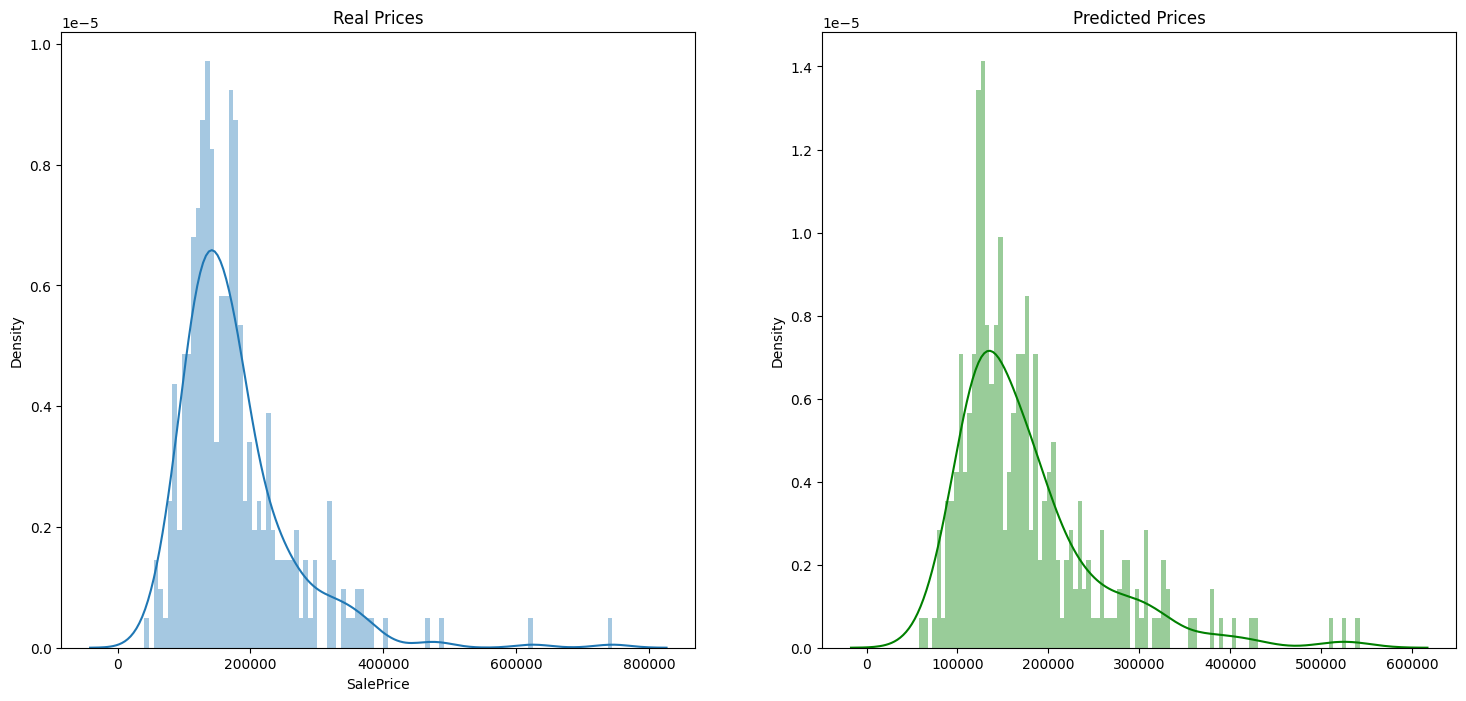

In [30]:
# Create a figure with two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))  # 18 width for wider figure to accommodate two plots

# First subplot for real prices
sns.distplot(val_set['SalePrice'], bins=100, hist_kws={'alpha': 0.4}, ax=axes[0])
axes[0].set_title('Real Prices')

# Second subplot for predicted prices
sns.distplot(pred2, color='g', bins=100, hist_kws={'alpha': 0.4}, ax=axes[1])
axes[1].set_title('Predicted Prices')

Slightly better than RandomForestModel, as the curve and price range seem to be a bit closer to the real prices when using GradientBoostedTreeModel

In [31]:
gb_model2 = tfdf.keras.GradientBoostedTreesModel(task = tfdf.keras.Task.REGRESSION, hyperparameter_template="benchmark_rank1")
gb_model2.compile(metrics=["accuracy"])

Resolve hyper-parameter template "benchmark_rank1" to "benchmark_rank1@v1" -> {'growing_strategy': 'BEST_FIRST_GLOBAL', 'categorical_algorithm': 'RANDOM', 'split_axis': 'SPARSE_OBLIQUE', 'sparse_oblique_normalization': 'MIN_MAX', 'sparse_oblique_num_projections_exponent': 1.0}.
Use /tmp/tmpa3sqnjmx as temporary training directory


In [32]:
gb_model2.fit(train_df)

Reading training dataset...
Training dataset read in 0:00:00.858158. Found 1168 examples.
Training model...
Model trained in 0:00:03.639111
Compiling model...


Model compiled.


In [34]:
evaluation = gb_model2.evaluate(x=val_df,return_dict=True)

for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")

1/1 [==============================] - 0s 456ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00
loss: 0.0000
accuracy: 0.0000


In [36]:
pred3 = gb_model2.predict(val_df, verbose=1)

1/1 [==============================] - 1s 551ms/step


<ipython-input-37-2d4f552357b6>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(val_set['SalePrice'], bins=100, hist_kws={'alpha': 0.4}, ax=axes[0])
<ipython-input-37-2d4f552357b6>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pred3, color='g', bins=100, hist_kws={'alpha': 0.4}, ax=axes[1])


Text(0.5, 1.0, 'Predicted Prices')

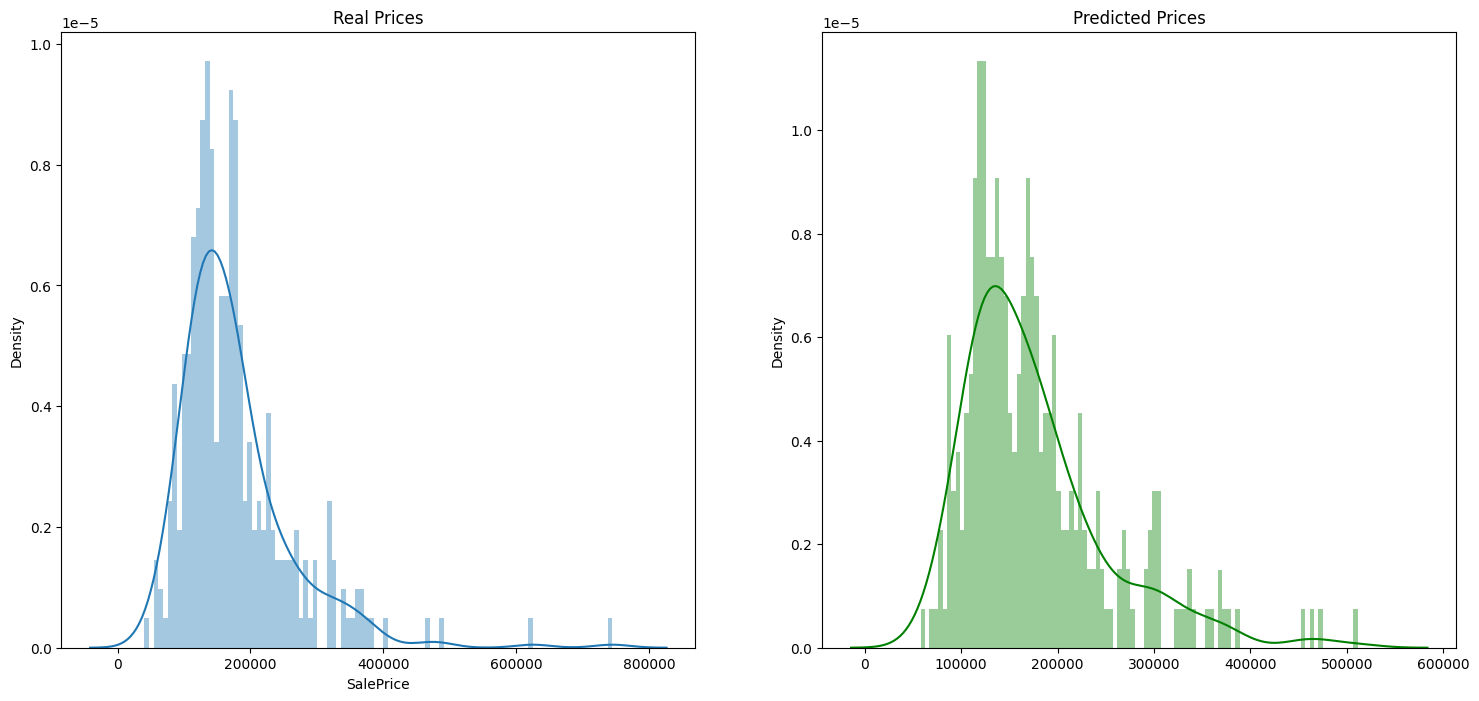

In [37]:
# Create a figure with two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))  # 18 width for wider figure to accommodate two plots

# First subplot for real prices
sns.distplot(val_set['SalePrice'], bins=100, hist_kws={'alpha': 0.4}, ax=axes[0])
axes[0].set_title('Real Prices')

# Second subplot for predicted prices
sns.distplot(pred3, color='g', bins=100, hist_kws={'alpha': 0.4}, ax=axes[1])
axes[1].set_title('Predicted Prices')

...The density seems much closer now

## Maybe remove NAN columns, they seem to not play important roles when predicting

## Pre-process our Data by filling and transforming our training and validation set separetely